In [28]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
def graph(data, labels, title):
    from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

    fig = {
      "data": [
        {
          "values": data,
          "labels": labels,
          "domain": {"x": [0, .48]},
          "name": "",
          "hoverinfo":"label+value+percent",
          "hole": .4,
          "type": "pie",
          "sort": False
        }],
      "layout": {
            "title": title,
            "annotations": [
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "",
                    "x": 0.20,
                    "y": 0.5
                }
            ]
        }
    }
    iplot(fig, filename=title)


In [3]:
contract_sigef = pd.ExcelFile("Queries/Data Contrato SIGEF Junio 2018.xlsx").parse("Hoja1")
contract_sigef.MesAprobacion = contract_sigef.MesAprobacion.apply(lambda x: x.title()[:3])

In [4]:
MONTH = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

## Compras mensuales

In [5]:
contracts_by_month = pd.pivot_table(contract_sigef, values=["IdentificacionDeContrato", "ValorTotal"], index=["MesAprobacion"], aggfunc={"IdentificacionDeContrato":np.count_nonzero, "ValorTotal":np.sum})
contracts_by_month = pd.DataFrame(contracts_by_month, index=MONTH).fillna(0)
contracts_by_month.columns = ["Cantidad", "Monto"]
contracts_by_month = contracts_by_month.transpose()
contracts_by_month

,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
Cantidad,843.00,"1,215.00","1,603.00","1,520.00","1,768.00","1,415.00",0.00,0.00,0.00,0.00,0.00,0.00
Monto,"1,449,347,854.73","1,181,287,255.32","550,863,081.91","1,394,368,966.06","1,970,414,147.73","1,497,647,766.91",0.00,0.00,0.00,0.00,0.00,0.00


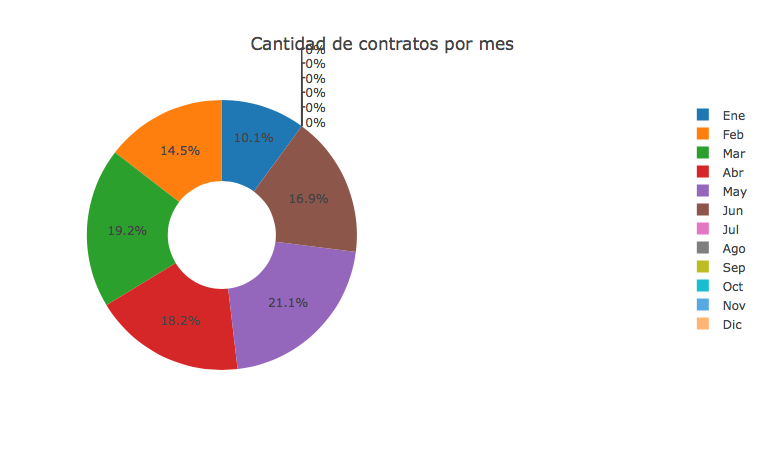

In [6]:
graph(data=contracts_by_month.loc["Cantidad"].values.tolist(), labels=contracts_by_month.columns, title="Cantidad de contratos por mes")

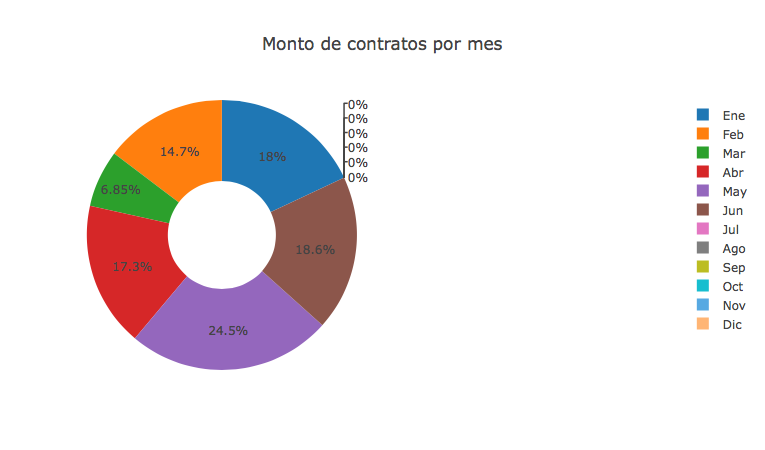

In [7]:
graph(data=contracts_by_month.loc["Monto"].values.tolist(), labels=contracts_by_month.columns, title="Monto de contratos por mes")

## Compras por tipo de proveedor

In [8]:
CLASIF_RPE = ["MIPYMES no certificadas y otras organizaciones", "Gran empresa", "MIPYMES Certificadas por el MIC", "Persona Fisica"]
contract_sigef.ClasificacionRPE = contract_sigef.ClasificacionRPE.fillna("Persona Fisica")
contract_sigef.ClasificacionRPE = contract_sigef.ClasificacionRPE.replace("No Especificada", "MIPYMES no certificadas y otras organizaciones")
contract_sigef.ClasificacionRPE = contract_sigef.ClasificacionRPE.replace("No clasificada", "MIPYMES no certificadas y otras organizaciones")

contract_sigef.ClasificacionRPE = contract_sigef.ClasificacionRPE.replace("Mediana empresa", "MIPYMES Certificadas por el MIC")
contract_sigef.ClasificacionRPE = contract_sigef.ClasificacionRPE.replace("Micro empresa", "MIPYMES Certificadas por el MIC")
contract_sigef.ClasificacionRPE = contract_sigef.ClasificacionRPE.replace("Pequeña empresa", "MIPYMES Certificadas por el MIC")

contract_sigef_all_MiPyme = contract_sigef
contract_sigef_no_MiPyme = contract_sigef[contract_sigef.CertificadoPorMIC=="No"]

In [11]:
contracts_by_month_prov = pd.pivot_table(contract_sigef_all_MiPyme, index=["MesAprobacion", "ClasificacionRPE"], values=["IdentificacionDeContrato", "ValorTotal"], aggfunc={"IdentificacionDeContrato":np.count_nonzero, "ValorTotal":np.sum})
contracts_by_month_prov = pd.DataFrame(contracts_by_month_prov, index=[(m, c) for m in MONTH for c in CLASIF_RPE]).fillna(0)
contracts_by_month_prov.columns = ["Cantidad", "Monto"]

dic = contracts_by_month_prov.to_dict()
new_dic = {m:{(t, c):dic[t][(m,c)] for c in CLASIF_RPE for t in ["Cantidad", "Monto"]} for m in MONTH}

contracts_by_month_prov = pd.DataFrame.from_dict(new_dic)

In [25]:
contracts_by_month_prov
num_contracts_by_month_prov = contracts_by_month_prov.transpose()["Cantidad"]
mount_contracts_by_month_prov = contracts_by_month_prov.transpose()["Monto"]

In [26]:
num_contracts_by_month_prov

,Gran empresa,MIPYMES Certificadas por el MIC,MIPYMES no certificadas y otras organizaciones,Persona Fisica
Ene,39.00,255.00,502.00,47.00
Feb,56.00,340.00,709.00,110.00
Mar,88.00,458.00,936.00,121.00
Abr,65.00,410.00,922.00,123.00
May,73.00,516.00,"1,065.00",114.00
Jun,70.00,382.00,886.00,77.00
Jul,0.00,0.00,0.00,0.00
Ago,0.00,0.00,0.00,0.00
Sep,0.00,0.00,0.00,0.00
Oct,0.00,0.00,0.00,0.00
